<a href="https://colab.research.google.com/github/rhf24/week6/blob/main/read_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import** **Libraries**

In [1]:
%pip install numpy pillow

In [2]:
import numpy as np
from PIL import Image
import requests

# read - show image


In [6]:

ur='https://images.unsplash.com/photo-1575936123452-b67c3203c357?q=80&w=870&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'

img = Image.open(requests.get(ur, stream= True).raw)

arr= np.asarray(img)



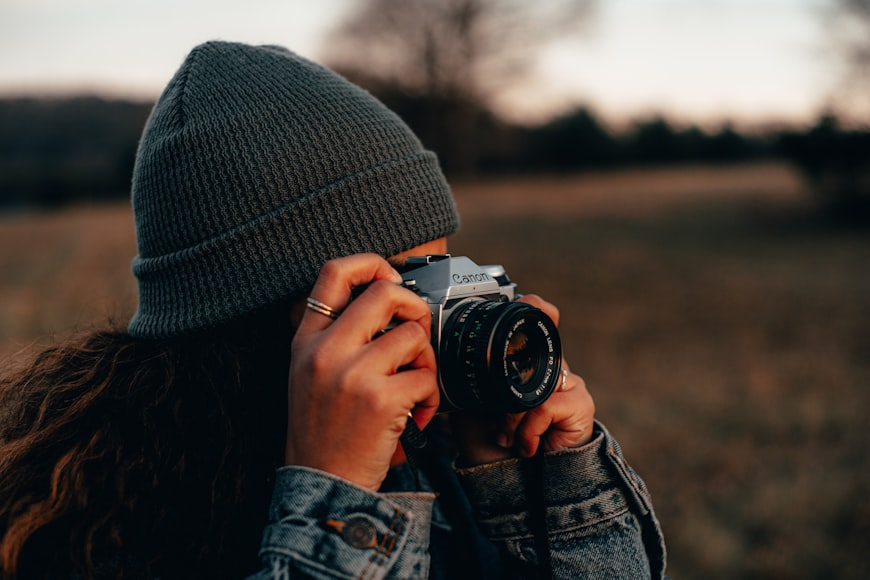

In [7]:
display(img)

# images are Arrays

In [8]:
arr.shape

(580, 870, 3)

In [9]:
dict(
    zip(["height", "width", "channels"], arr.shape)
)

{'height': 580, 'width': 870, 'channels': 3}

In [10]:
arr.dtype

dtype('uint8')

In [11]:
arr.min(), arr.max()

(0, 255)

In [12]:
y, x = 300, 400
arr[y, x]

array([210, 130,  81], dtype=uint8)

In [13]:
dict(zip("RGB", arr[y,x]))

{'R': 210, 'G': 130, 'B': 81}

# Pixel Access

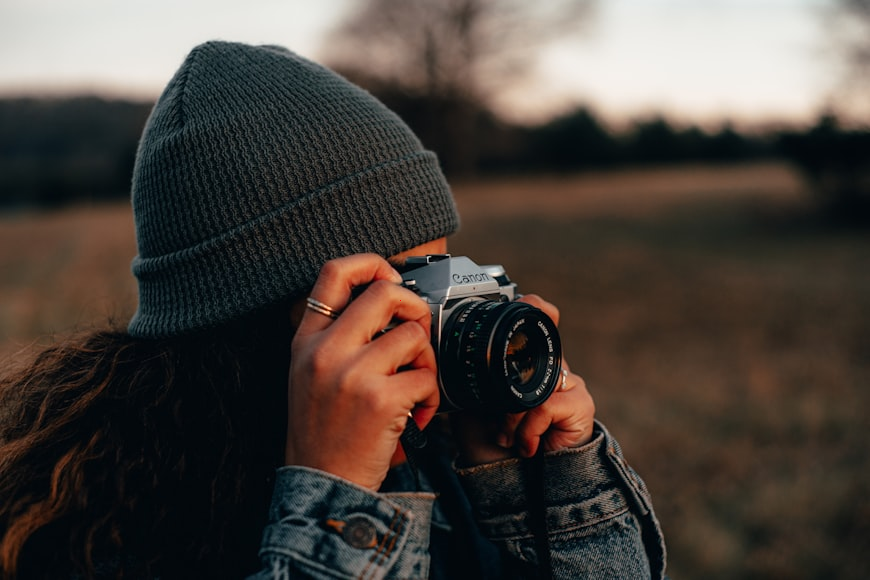

In [14]:
arr = arr.copy()

arr[y,x] = (255, 0, 0)

Image.fromarray(arr)

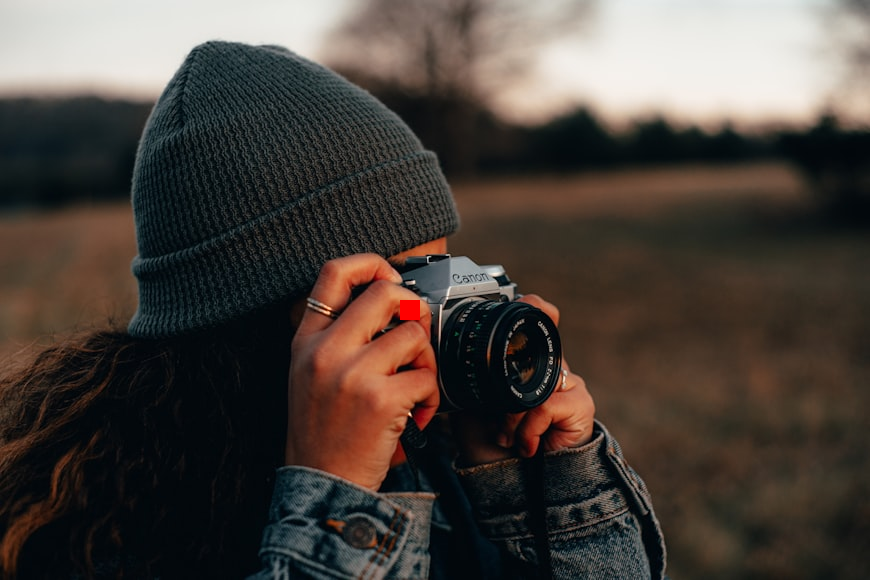

In [15]:
arr[y : y +20, x : x +20] = (255,0,0)
Image.fromarray(arr)

## crop and paste

crop part

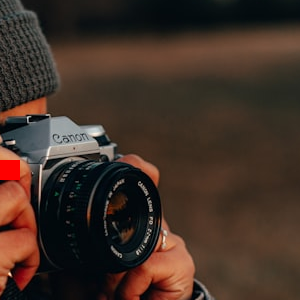

In [16]:
top, left = 140, 400

height, width = 300, 300

crop = arr[top : top + height, left : left + width]

Image.fromarray(crop)

paste crop in the top-left

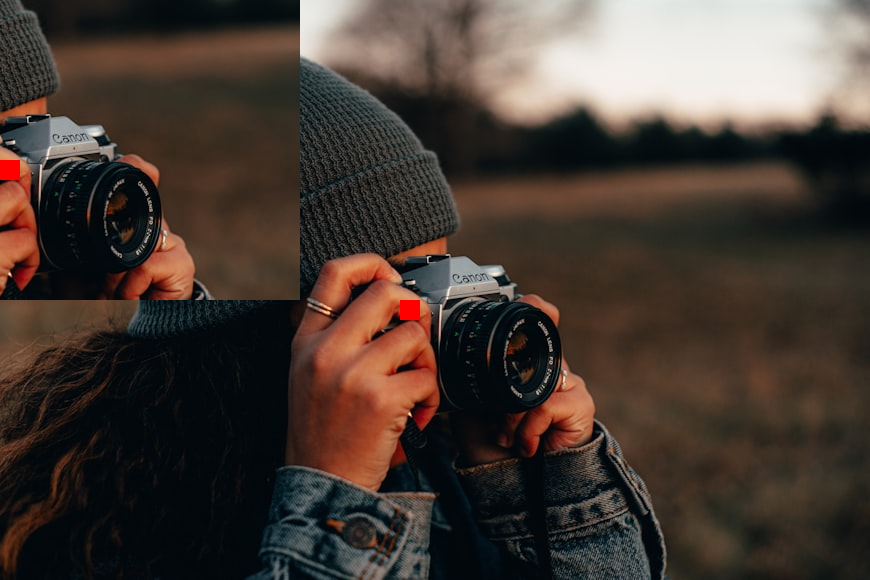

In [17]:
y, x = 0, 0
arr[y : y + height, x : x + width] = crop

Image.fromarray(arr)

# flip

flip upside-down

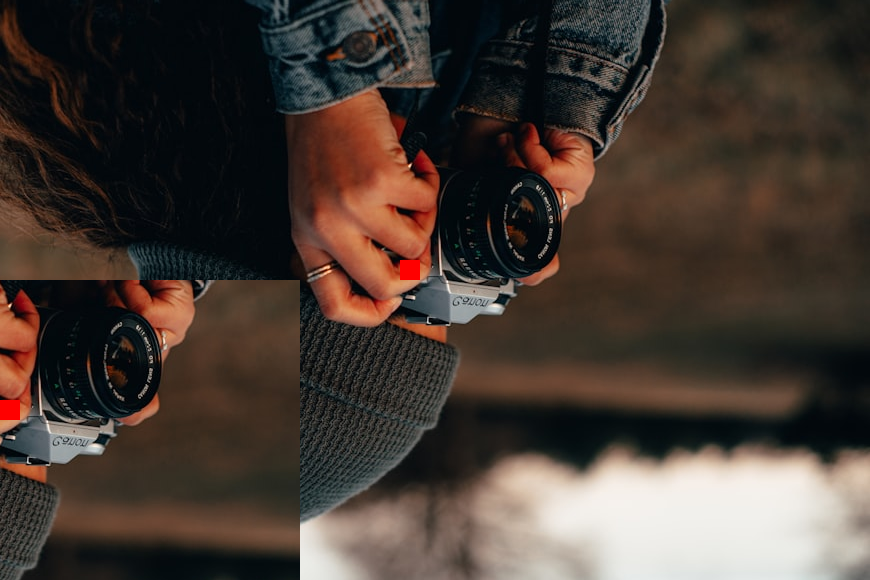

In [18]:
Image.fromarray(arr[::-1])

flip left to right

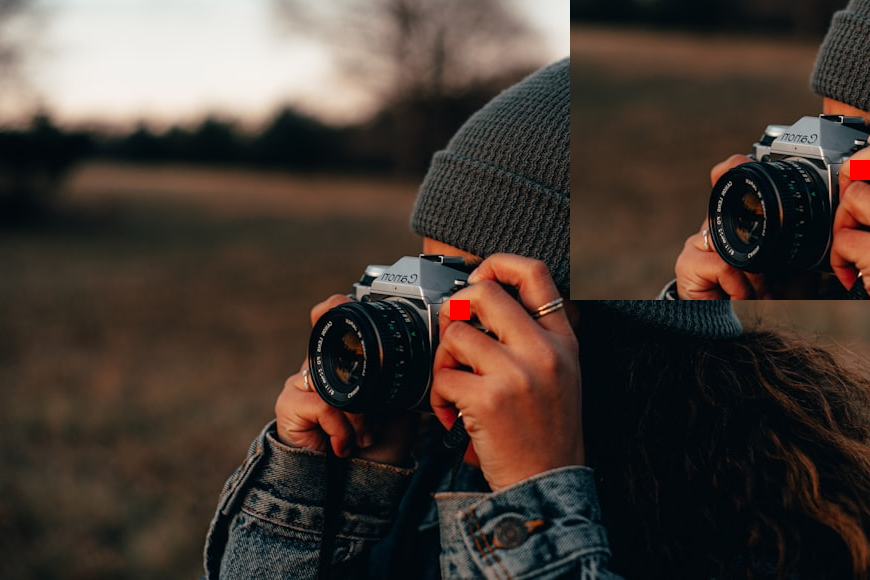

In [19]:
Image.fromarray(arr[:, ::-1])

Invert

array([[[ 46,  51,  47],
        [ 40,  46,  42],
        [ 59,  64,  60],
        ...,
        [107, 107, 105],
        [107, 107, 105],
        [107, 107, 105]],

       [[ 76,  81,  77],
        [ 51,  57,  53],
        [ 39,  44,  40],
        ...,
        [106, 106, 104],
        [106, 106, 104],
        [106, 106, 104]],

       [[ 71,  77,  73],
        [ 55,  64,  59],
        [ 31,  37,  33],
        ...,
        [104, 104, 102],
        [104, 104, 102],
        [104, 104, 102]],

       ...,

       [[  9,  10,  12],
        [ 10,  10,  10],
        [ 13,  11,  12],
        ...,
        [ 25,  27,  24],
        [ 26,  28,  25],
        [ 26,  28,  25]],

       [[  8,   9,  11],
        [  9,   9,   9],
        [ 12,  10,  11],
        ...,
        [ 26,  28,  25],
        [ 26,  28,  25],
        [ 27,  29,  26]],

       [[  8,   9,  11],
        [  8,   8,   8],
        [ 12,  10,  11],
        ...,
        [ 26,  28,  25],
        [ 27,  29,  26],
        [ 27,  29,  26]]], dtype=uint8)
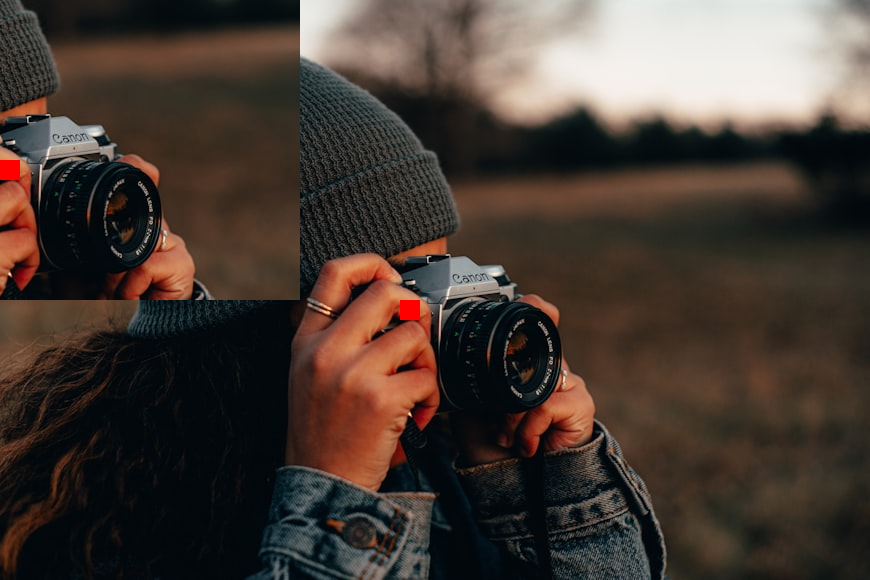

In [20]:
arr

array([[[209, 204, 208],
        [215, 209, 213],
        [196, 191, 195],
        ...,
        [148, 148, 150],
        [148, 148, 150],
        [148, 148, 150]],

       [[179, 174, 178],
        [204, 198, 202],
        [216, 211, 215],
        ...,
        [149, 149, 151],
        [149, 149, 151],
        [149, 149, 151]],

       [[184, 178, 182],
        [200, 191, 196],
        [224, 218, 222],
        ...,
        [151, 151, 153],
        [151, 151, 153],
        [151, 151, 153]],

       ...,

       [[246, 245, 243],
        [245, 245, 245],
        [242, 244, 243],
        ...,
        [230, 228, 231],
        [229, 227, 230],
        [229, 227, 230]],

       [[247, 246, 244],
        [246, 246, 246],
        [243, 245, 244],
        ...,
        [229, 227, 230],
        [229, 227, 230],
        [228, 226, 229]],

       [[247, 246, 244],
        [247, 247, 247],
        [243, 245, 244],
        ...,
        [229, 227, 230],
        [228, 226, 229],
        [228, 226, 229]]], dtype=uint8)
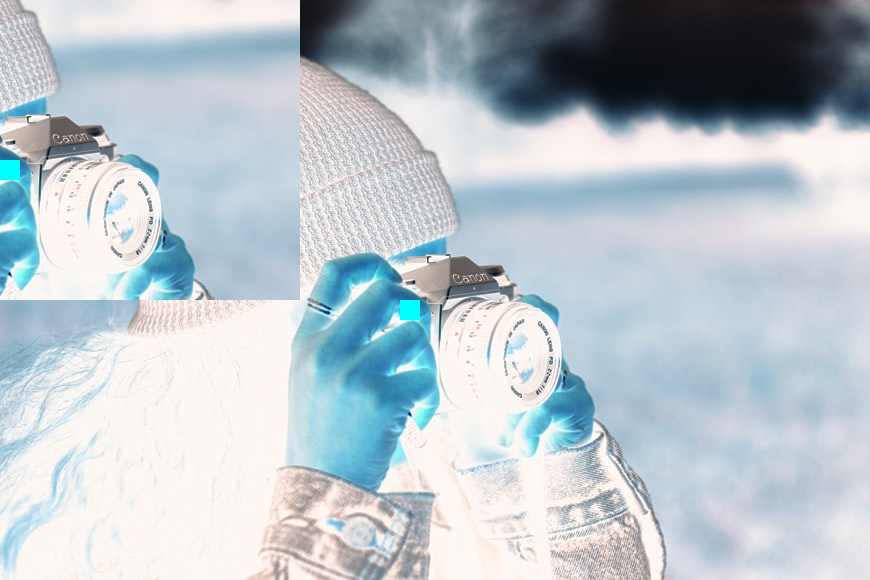

In [21]:
~arr

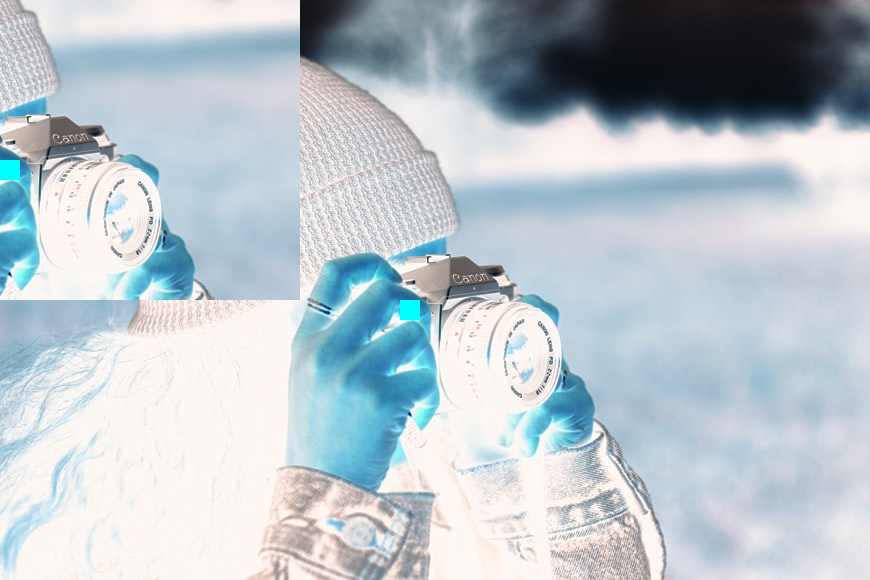

In [22]:
Image.fromarray(~arr)

color Channels

In [23]:
r, g, b= np.moveaxis(arr,-1,0)

red

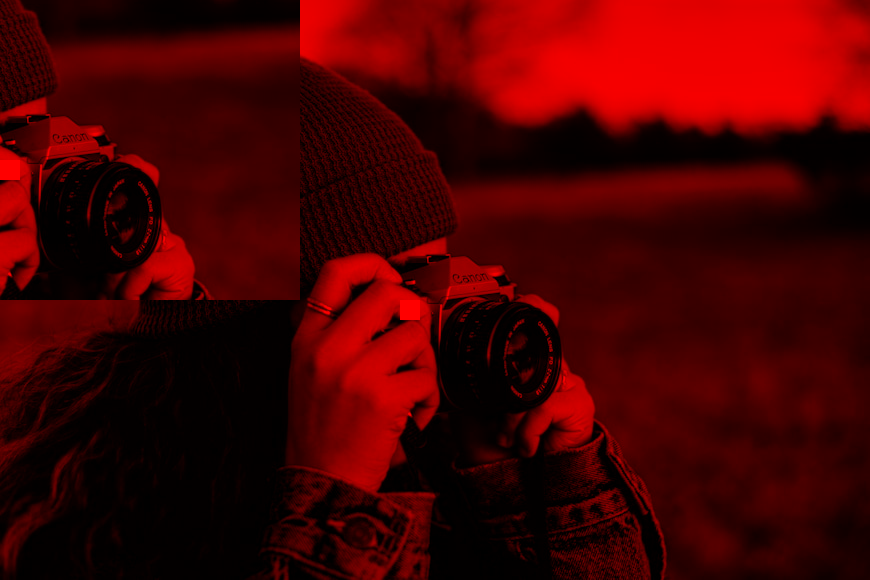

In [24]:
Image.fromarray(np.stack([r, g*0, b*0], axis=-1))

blue

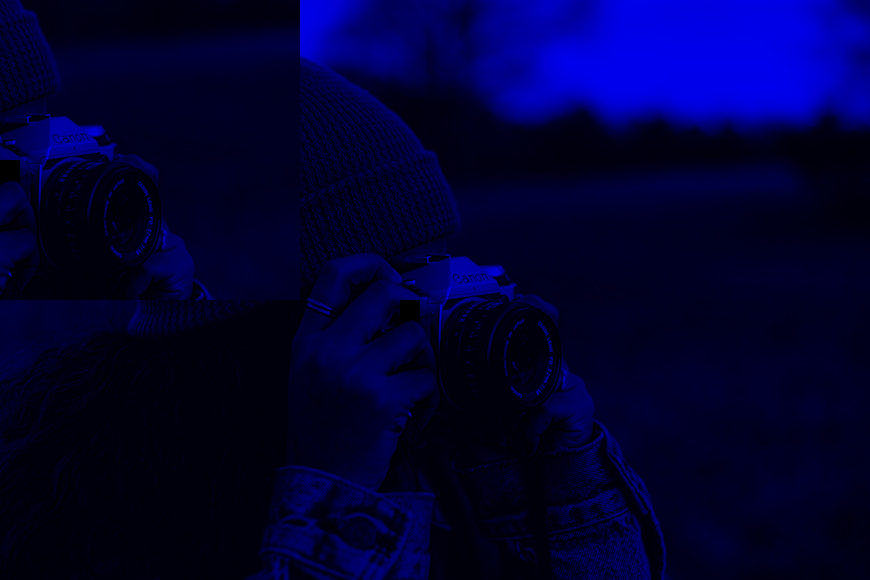

In [25]:
Image.fromarray(np.stack([r*0, g*0, b], axis=-1))

green

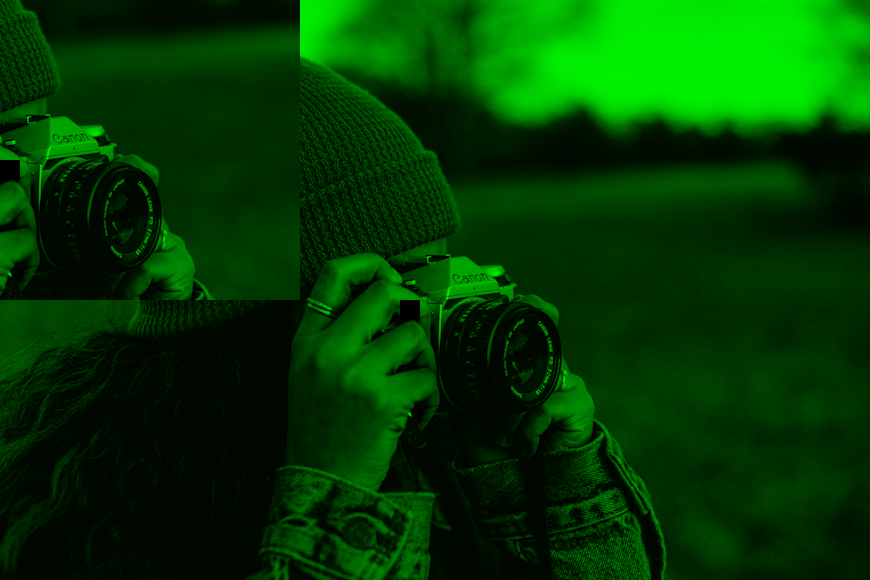

In [26]:
Image.fromarray(np.stack([r*0, g, b*0], axis=-1))

# MediumAquamarine

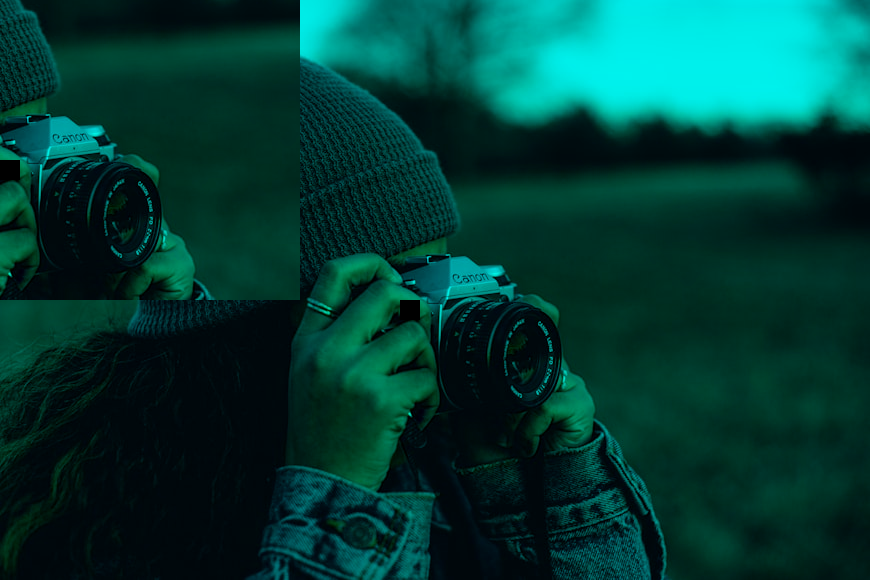

In [27]:
Image.fromarray(np.stack([r*0, g, b], axis=-1))

# DarkMagenta

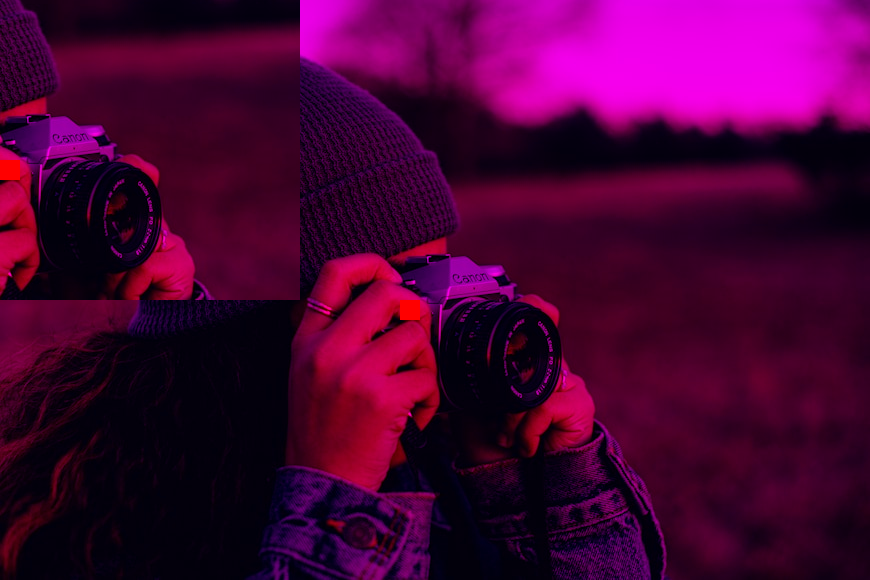

In [28]:
Image.fromarray(np.stack([r, g*0, b], axis=-1))

# YellowGreen

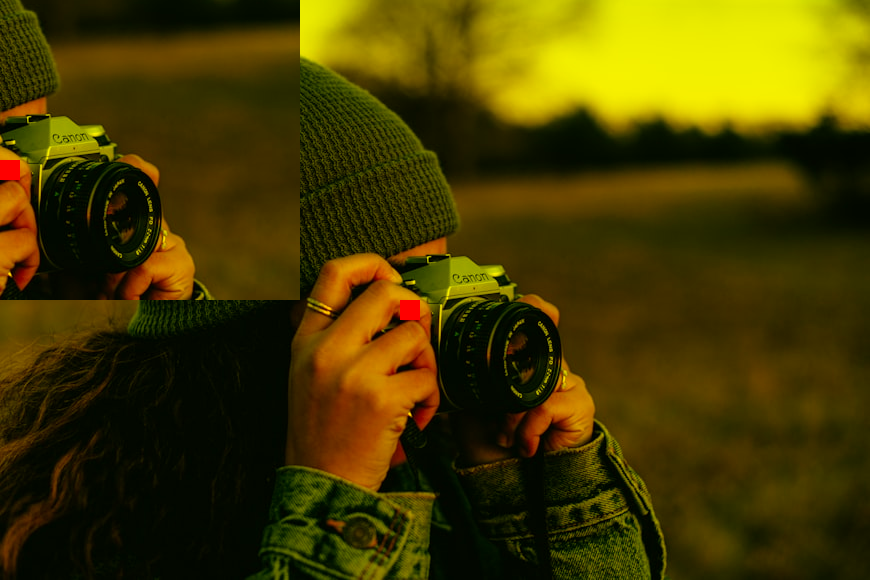

In [29]:
Image.fromarray(np.stack([r, g, b*0], axis=-1))

Grayscale

grayscale by combining

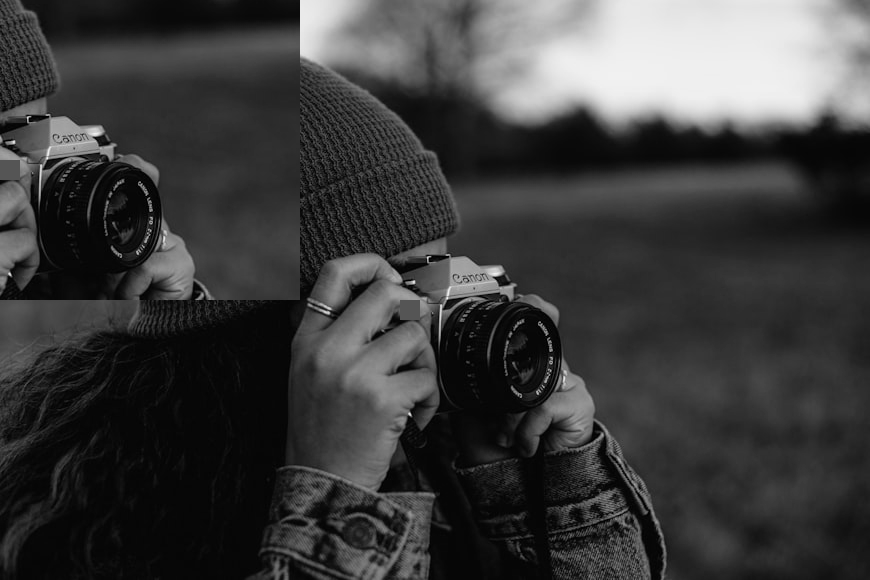

In [30]:
gray= (r/3+g/3+b/3).astype(np.uint8)
Image.fromarray(gray)

sensetivity of the human eye

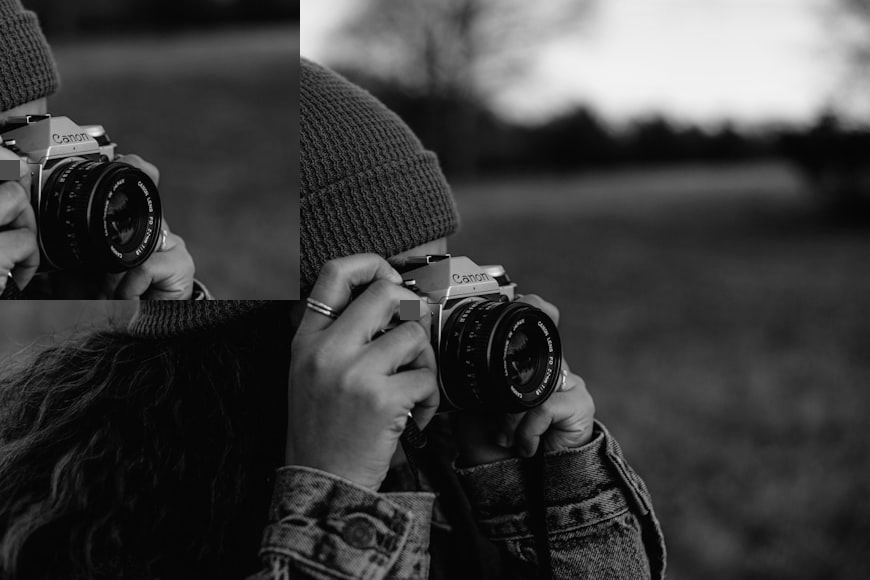

In [31]:
gray = (r * 0.299 + g * 0.587 + b * 0.114).astype("uint8")
Image.fromarray(gray)

Thresholding

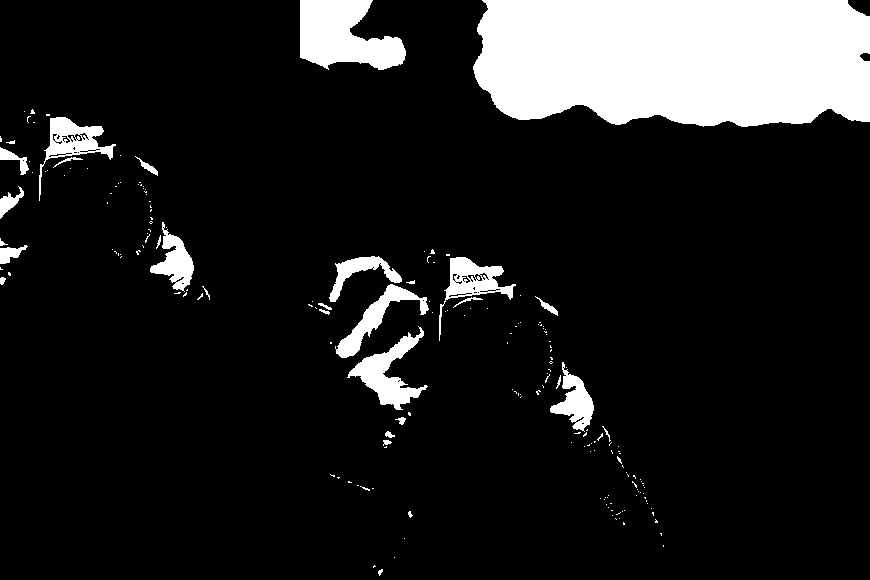

In [32]:
threshold = 128

mask = gray > threshold
Image.fromarray(mask)

process called thresholding

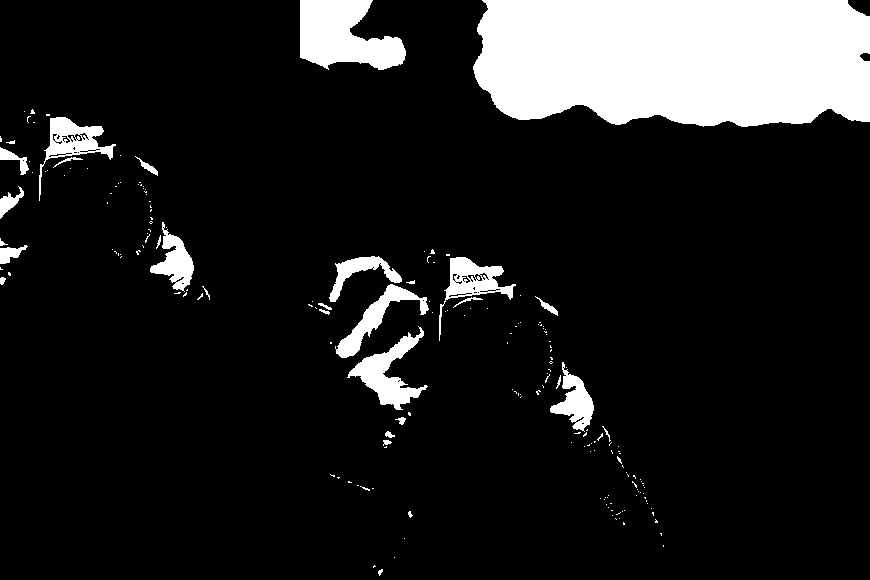

In [33]:
threshold = 128

mask = gray > threshold
Image.fromarray(mask)

hide everthing in the image
except for those pixels

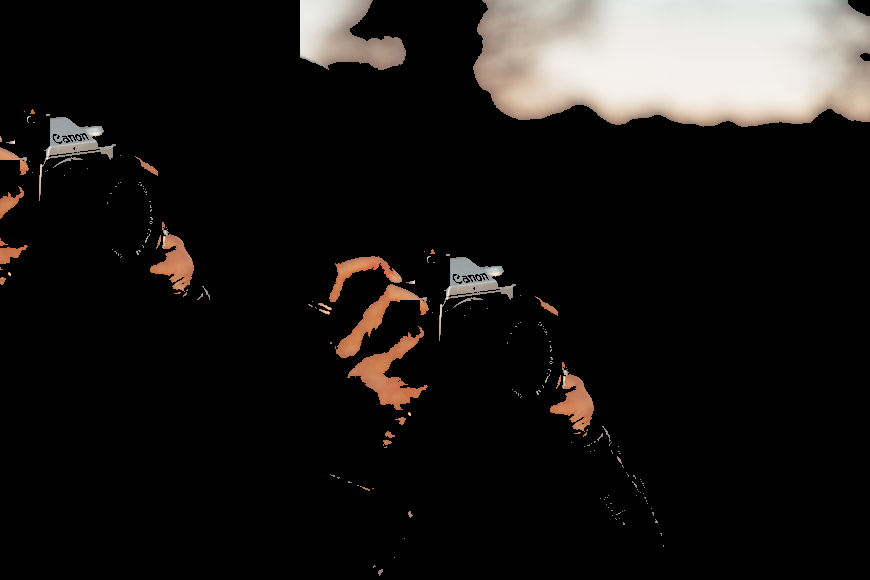

In [34]:
arr[~mask] = 0
Image.fromarray(arr)